In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

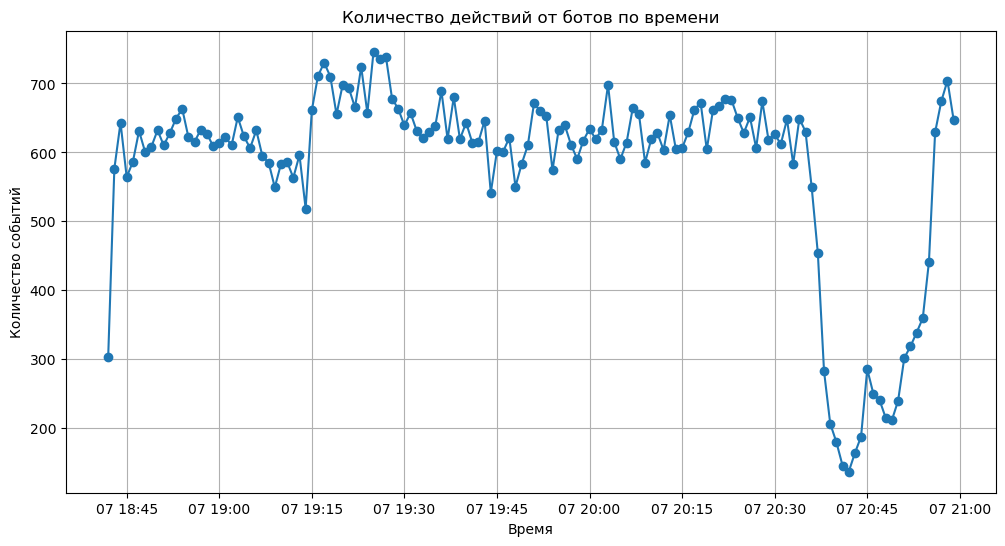

In [9]:
#подозрение на аномалию
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv', parse_dates=['ts'])

bots_df = df[df['ua_is_bot'] == 1]
bot_counts = bots_df.resample('10min', on='ts').size() 

plt.figure(figsize=(12, 6))
plt.plot(bot_counts.index, bot_counts.values, marker='o', linestyle='-')
plt.title('Количество действий от ботов по времени')
plt.xlabel('Время')
plt.ylabel('Количество событий')
plt.grid()
plt.show()

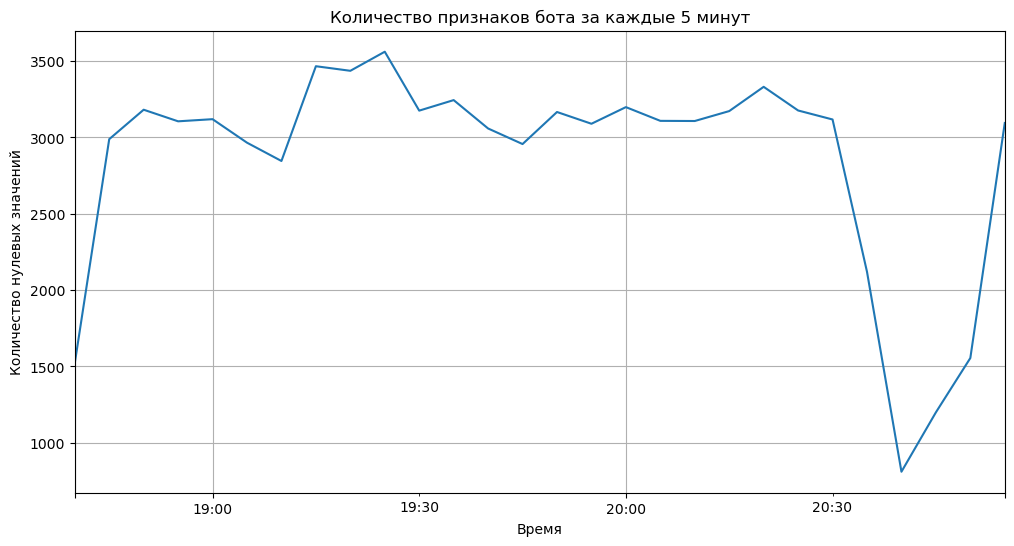

In [39]:
#подозрение на аномалию (согласуется с графиком выше)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dataset.csv", usecols=['ts', 'ua_is_bot'], parse_dates=['ts'])
bot = df[df['ua_is_bot'] == 1]
bot_counts = zero_registration.set_index('ts').resample('5min').size()

plt.figure(figsize=(12, 6))
bot_counts.plot()
plt.title("Количество признаков бота за каждые 5 минут")
plt.xlabel("Время")
plt.ylabel("Количество нулевых значений")
plt.grid()
plt.show()

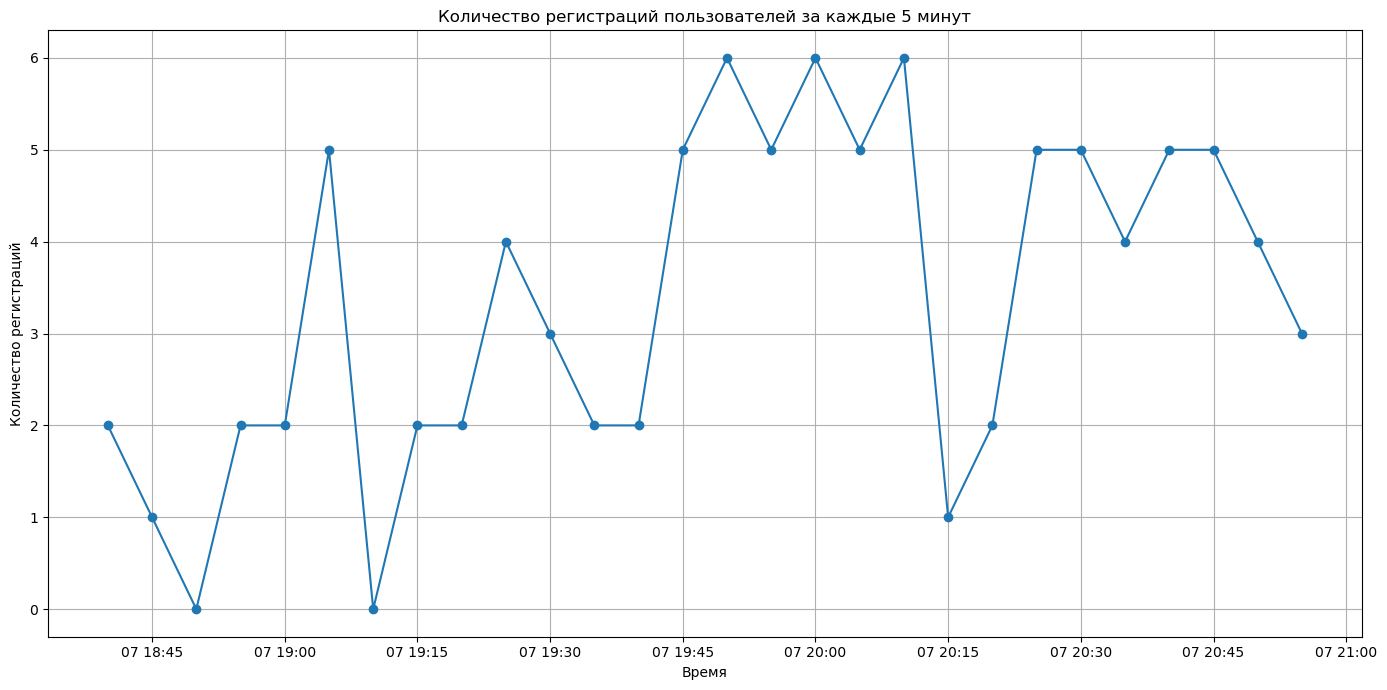

In [48]:
#аномалий нет
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv', parse_dates=['ts'])
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

registration_data = df[df['is_registration'] == 1]

registrations_count = registration_data.resample('5min', on='ts').size()

plt.figure(figsize=(14, 7))
plt.plot(registrations_count.index, registrations_count.values, marker='o', linestyle='-')
plt.title('Количество регистраций пользователей за каждые 5 минут')
plt.xlabel('Время')
plt.ylabel('Количество регистраций')
plt.grid()
plt.tight_layout()
plt.show()


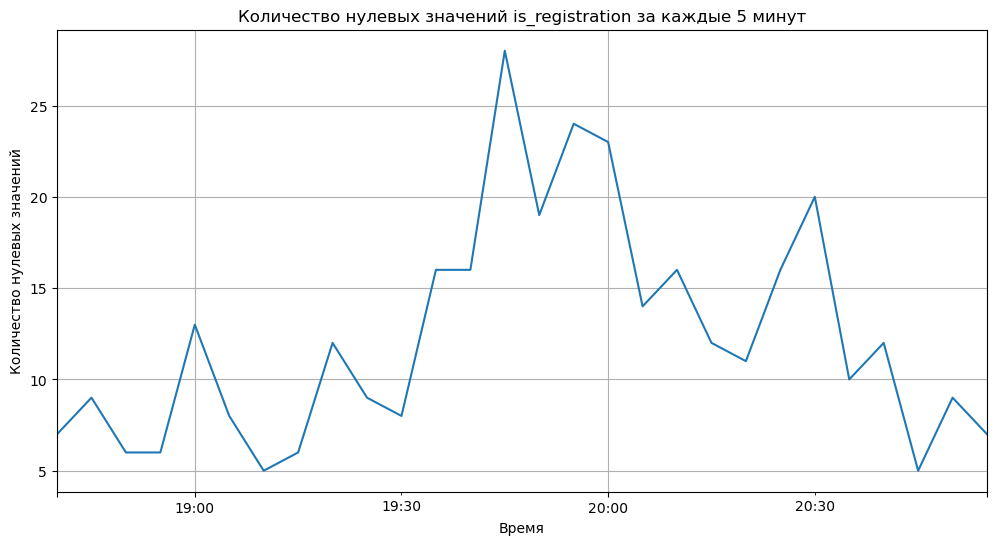

In [35]:
#аномалий нет
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dataset.csv", usecols=['ts', 'is_registration'], parse_dates=['ts'])

zero_registration = df[df['is_registration'] == 0]
zero_counts = zero_registration.set_index('ts').resample('5min').size()

plt.figure(figsize=(12, 6))
zero_counts.plot()
plt.title("Количество нулевых значений is_registration за каждые 5 минут")
plt.xlabel("Время")
plt.ylabel("Количество нулевых значений")
plt.grid()
plt.show()

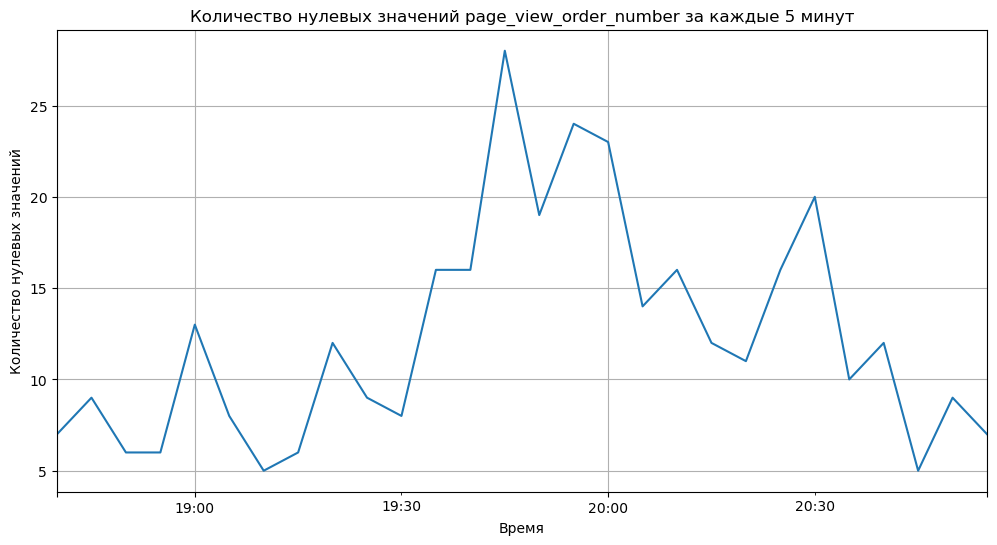

In [3]:
#аномалий нет
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dataset.csv", usecols=['ts', 'geo_country_title_ru'], parse_dates=['ts'])

zero_registration = df[df['geo_country_title_ru'] == 0]
zero_counts = zero_registration.set_index('ts').resample('5min').size()

plt.figure(figsize=(12, 6))
zero_counts.plot()
plt.title("Количество нулевых значений `geo_country_title_ru` за каждые 5 минут")
plt.xlabel("Время")
plt.ylabel("Количество нулевых значений")
plt.grid()
plt.show()

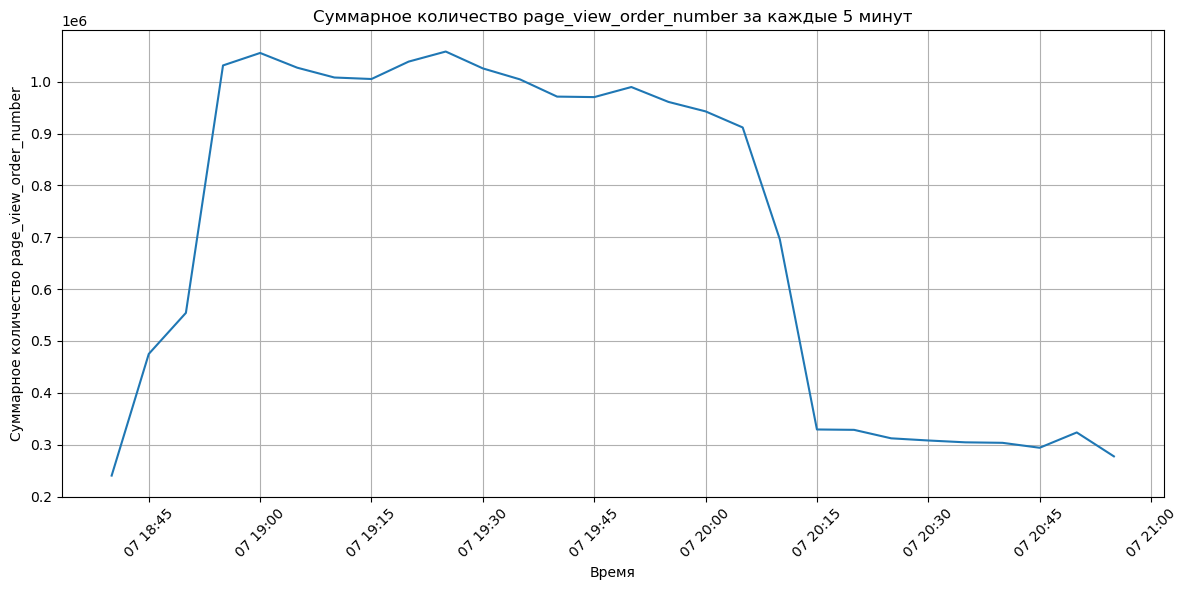

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("dataset.csv", usecols=['ts', 'page_view_order_number'], parse_dates=['ts'])

# Группировка данных по времени с интервалом в 5 минут
page_view_counts = df.set_index('ts').resample('5min').sum()

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=page_view_counts['page_view_order_number'])
plt.title("Суммарное количество page_view_order_number за каждые 5 минут")
plt.xlabel("Время")
plt.ylabel("Суммарное количество page_view_order_number")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


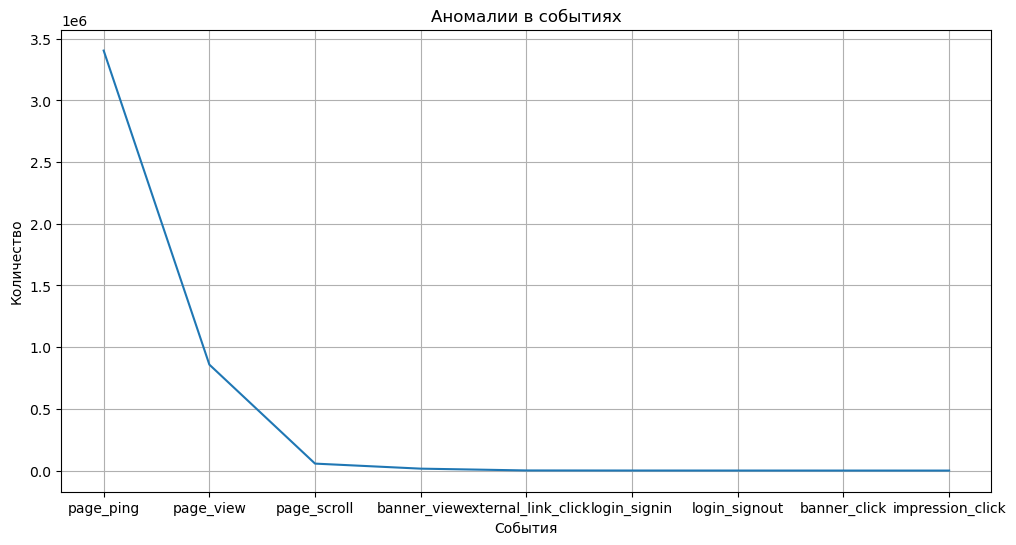

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#Z-оценка
df = pd.read_csv("dataset.csv", parse_dates=['ts'])
event_counts = df['event'].value_counts()

z_scores = np.abs(stats.zscore(event_counts))

threshold = 3
anomalies = event_counts[z_scores > threshold]

plt.figure(figsize=(12, 6))
plt.plot(event_counts.index, event_counts.values)
plt.scatter(anomalies.index, anomalies.values, color='red') #аномалии выделились бы красным
plt.title("Аномалии в событиях")
plt.xlabel("События")
plt.ylabel("Количество")
plt.grid()
plt.show()